# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [61]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [62]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [63]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [64]:
# Scrape the website
html = browser.html

# Create a BeautifulSoup object from the scraped HTML
page_soup = soup(html, 'html.parser')

In [65]:
# Find the table containing the rows of data directly by tag name
table = page_soup.find('table')

# Check if the table is found
if table is not None:
    print("Table found.")
    # Find all rows (tr elements) within the table
    rows = table.find_all('tr')

    # Loop through each row to extract and print the data
    for row in rows:
        # Find all cells (td elements) within the row
        cells = row.find_all('td')
        
        # Extract and print the data in each cell
        for cell in cells:
            print(cell.get_text())


Table found.
2
2012-08-16
10
155
6
-75.0
739.0
13
2012-08-17
11
156
6
-76.0
740.0
24
2012-08-18
12
156
6
-76.0
741.0
35
2012-08-19
13
157
6
-74.0
732.0
46
2012-08-20
14
157
6
-74.0
740.0
57
2012-08-21
15
158
6
-78.0
740.0
68
2012-08-22
16
158
6
-77.0
740.0
79
2012-08-23
17
159
6
-76.0
742.0
112
2012-08-27
21
161
6
-74.0
741.0
114
2012-08-28
22
162
6
-74.0
742.0
123
2012-08-29
23
162
6
-75.0
741.0
134
2012-08-30
24
163
6
-75.0
742.0
145
2012-08-31
25
163
6
-75.0
743.0
156
2012-09-01
26
164
6
-76.0
745.0
163
2012-09-02
27
164
6
-75.0
743.0
170
2012-09-03
28
165
6
-75.0
745.0
171
2012-09-04
29
166
6
-75.0
747.0
172
2012-09-05
30
166
6
-74.0
747.0
173
2012-09-06
31
167
6
-74.0
745.0
175
2012-09-08
33
168
6
-73.0
748.0
176
2012-09-10
34
168
6
-73.0
748.0
177
2012-09-11
35
169
6
-73.0
749.0
178
2012-09-12
36
169
6
-73.0
750.0
179
2012-09-13
37
170
6
-73.0
750.0
180
2012-09-14
38
171
6
-73.0
750.0
181
2012-09-15
39
171
6
-75.0
751.0
182
2012-09-16
40
172
6
-75.0
753.0
183
2012-09-17
41
172
6


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [66]:
# Create an empty list to store data
data_list = []

# Loop through the scraped data to create a list of rows
for row in rows[1:]:  # Skip the header row
    cells = row.find_all('td')
    data_dict = {
        'id': cells[0].get_text(),
        'terrestrial_date': cells[1].get_text(),
        'sol': cells[2].get_text(),
        'ls': cells[3].get_text(),
        'month': cells[4].get_text(),
        'min_temp': cells[5].get_text(),
        'pressure': cells[6].get_text()
    }
    data_list.append(data_dict)

# Print the list of dictionaries (optional)
print(data_list)

[{'id': '2', 'terrestrial_date': '2012-08-16', 'sol': '10', 'ls': '155', 'month': '6', 'min_temp': '-75.0', 'pressure': '739.0'}, {'id': '13', 'terrestrial_date': '2012-08-17', 'sol': '11', 'ls': '156', 'month': '6', 'min_temp': '-76.0', 'pressure': '740.0'}, {'id': '24', 'terrestrial_date': '2012-08-18', 'sol': '12', 'ls': '156', 'month': '6', 'min_temp': '-76.0', 'pressure': '741.0'}, {'id': '35', 'terrestrial_date': '2012-08-19', 'sol': '13', 'ls': '157', 'month': '6', 'min_temp': '-74.0', 'pressure': '732.0'}, {'id': '46', 'terrestrial_date': '2012-08-20', 'sol': '14', 'ls': '157', 'month': '6', 'min_temp': '-74.0', 'pressure': '740.0'}, {'id': '57', 'terrestrial_date': '2012-08-21', 'sol': '15', 'ls': '158', 'month': '6', 'min_temp': '-78.0', 'pressure': '740.0'}, {'id': '68', 'terrestrial_date': '2012-08-22', 'sol': '16', 'ls': '158', 'month': '6', 'min_temp': '-77.0', 'pressure': '740.0'}, {'id': '79', 'terrestrial_date': '2012-08-23', 'sol': '17', 'ls': '159', 'month': '6', 'mi

In [67]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(data_list)

In [68]:
# Confirm DataFrame was created successfully
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [69]:
# Examine data type of each column
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [70]:
import pandas as pd

# Convert 'id' column to object (if it contains non-numeric values)
df['id'] = df['id'].astype('object')

# Convert 'terrestrial_date' column to datetime
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Convert 'sol' column to int (assuming it's numeric)
df['sol'] = df['sol'].astype(int)

# Convert 'ls' column to int (assuming it's numeric)
df['ls'] = df['ls'].astype(int)

# Convert 'month' column to int (assuming it's numeric)
df['month'] = df['month'].astype(int)

# Convert 'min_temp' column to float (assuming it's numeric)
df['min_temp'] = df['min_temp'].astype(float)

# Convert 'pressure' column to float (assuming it's numeric)
df['pressure'] = df['pressure'].astype(float)


In [71]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [72]:
# 1. How many months exists on Mars?
num_months = df['month'].nunique()
num_months

12

In [73]:
# 2. How many Martian days' worth of data are there?
num_martian_days = df['sol'].nunique()
num_martian_days 

1867

In [74]:
# 3. What is the average low temperature by month?

# Group the data by 'month' and calculate the average of 'min_temp'
average_low_by_month = df.groupby('month')['min_temp'].mean()

# Display the result
print(average_low_by_month)


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


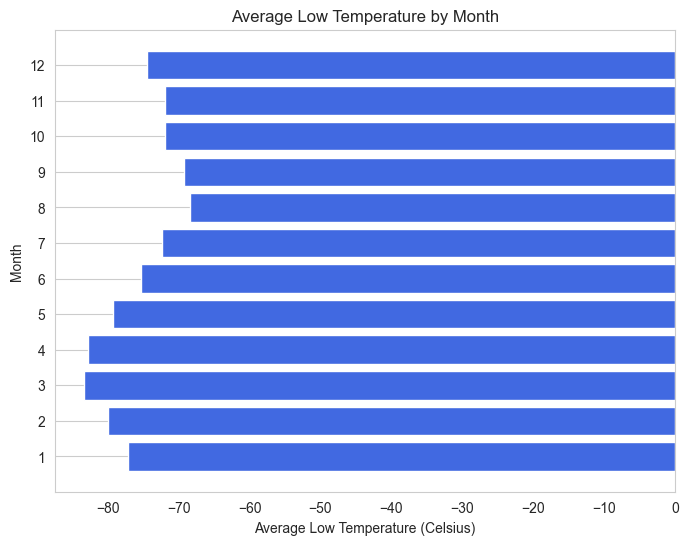

In [75]:
# Plot the average temperature by month

# Group the data by 'month' and calculate the average of 'min_temp'
average_low_by_month = df.groupby('month')['min_temp'].mean()

# Plot the perpendicular bar diagram
plt.figure(figsize=(8, 6))
plt.barh(average_low_by_month.index, average_low_by_month, color='royalblue')

# Set the title and labels
plt.title('Average Low Temperature by Month')
plt.xlabel('Average Low Temperature (Celsius)')
plt.ylabel('Month')

# Set the y-axis ticks to be the month numbers
plt.yticks(range(1, 13))

# Show grid
plt.grid(axis='x')

# Show the plot
plt.show()

In [76]:
# Identify the coldest and hottest months in Curiosity's location

## Group the data by 'month' and calculate the average of 'min_temp'
average_low_by_month = df.groupby('month')['min_temp'].mean()

## Find the coldest and hottest months
coldest_month = average_low_by_month.idxmin()
hottest_month = average_low_by_month.idxmax()

## Get the corresponding average low temperatures
coldest_temp = average_low_by_month[coldest_month]
hottest_temp = average_low_by_month[hottest_month]

## Print the results
print("Coldest month in Curiosity's location is month", coldest_month, "with an average low temperature of", coldest_temp, "Celsius.")
print("Hottest month in Curiosity's location is month", hottest_month, "with an average low temperature of", hottest_temp, "Celsius.")


Coldest month in Curiosity's location is month 3 with an average low temperature of -83.30729166666667 Celsius.
Hottest month in Curiosity's location is month 8 with an average low temperature of -68.38297872340425 Celsius.


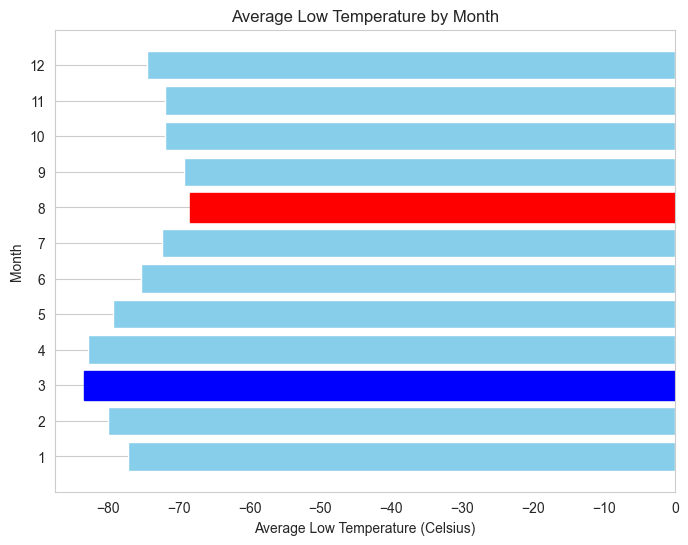

In [77]:
# PLOT DIAGRAM to identify the coldest and hottest months in Curiosity's location

# Group the data by 'month' and calculate the average of 'min_temp'
average_low_by_month = df.groupby('month')['min_temp'].mean()

# Find the coldest and hottest months
coldest_month = average_low_by_month.idxmin()
hottest_month = average_low_by_month.idxmax()

# Plot the perpendicular bar diagram
plt.figure(figsize=(8, 6))
bars = plt.barh(average_low_by_month.index, average_low_by_month, color='skyblue')

# Highlight the coldest and hottest months by changing the color of the bars
bars[coldest_month - 1].set_color('blue')  # Subtract 1 because month indices start from 1
bars[hottest_month - 1].set_color('red')   # Subtract 1 because month indices start from 1

# Set the title and labels
plt.title('Average Low Temperature by Month')
plt.xlabel('Average Low Temperature (Celsius)')
plt.ylabel('Month')

# Set the y-axis ticks to be the month numbers
plt.yticks(range(1, 13))

# Show grid
plt.grid(axis='x')

# Show the plot
plt.show()


In [78]:
# 4. Average pressure by Martian month

# Group the data by 'month' and calculate the average of 'pressure'
average_pressure_by_month = df.groupby('month')['pressure'].mean()

# Print the result
print(average_pressure_by_month)


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


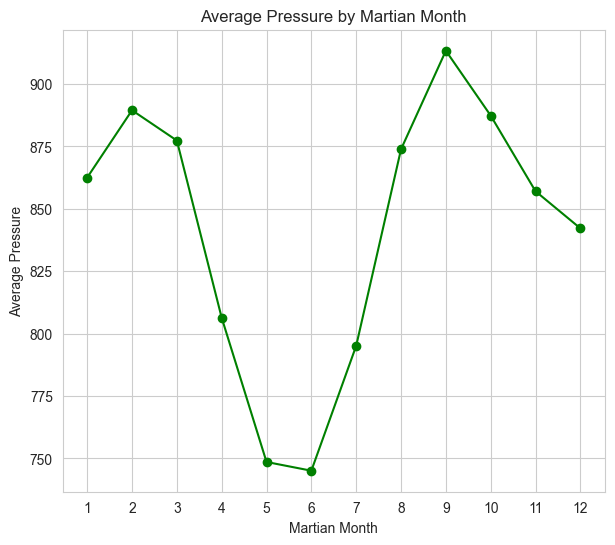

In [79]:
# Plot the average pressure by month

# Group the data by 'month' and calculate the average of 'pressure'
average_pressure_by_month = df.groupby('month')['pressure'].mean()

# Plot the average pressure by month
plt.figure(figsize=(7, 6))
plt.plot(average_pressure_by_month.index, average_pressure_by_month, marker='o', color='green')

# Set the title and labels
plt.title('Average Pressure by Martian Month')
plt.xlabel('Martian Month')
plt.ylabel('Average Pressure')

# Set the x-axis ticks to be the month numbers
plt.xticks(range(1, 13))

# Show grid
plt.grid(True)

# Show the plot
plt.show()


In [80]:
# 5. How many terrestrial (earth) days are there in a Martian year?


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

Total number of Martian days in a Martian year: 1977
Total number of Earth days in a Martian year: 1358199


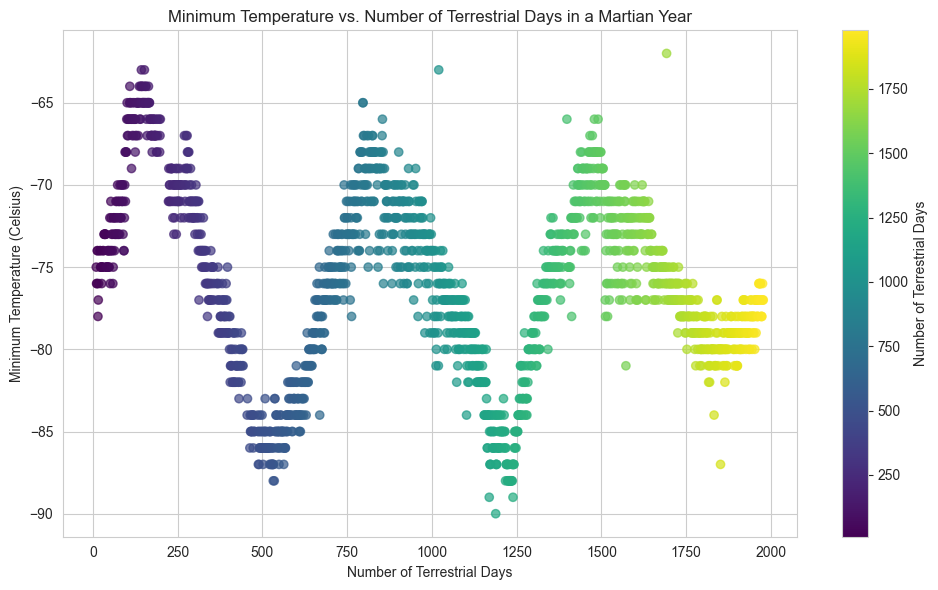

In [81]:
# Step 1: Analyze the Data
# Find the maximum value in the 'sol' column to get the total number of Martian days
total_martian_days = df['sol'].max()
print(f"Total number of Martian days in a Martian year: {total_martian_days}")

# Step 2: Convert Martian Days to Earth Days
conversion_rate = 687
total_earth_days = total_martian_days * conversion_rate
print(f"Total number of Earth days in a Martian year: {total_earth_days}")

# Create a Plot with Matplotlib
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' contains the relevant data with 'min_temp' and 'sol' columns

# Create a colormap
cmap = plt.get_cmap('viridis')

# Normalize colors based on sol values
normalize = plt.Normalize(vmin=df['sol'].min(), vmax=df['sol'].max())

# Set up colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=normalize)
sm.set_array([])  # You need to set a dummy array here

# Plot data points with colors based on sol values
fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure and axis object
scatter = ax.scatter(df['sol'], df['min_temp'], c=df['sol'], cmap=cmap, marker='o', alpha=0.7)

# Add colorbar
cbar = plt.colorbar(sm, ax=ax, label='Number of Terrestrial Days')  # Provide the 'ax' argument

# Set labels and title
ax.set_xlabel('Number of Terrestrial Days')  # Use ax.set_xlabel instead of plt.xlabel
ax.set_ylabel('Minimum Temperature (Celsius)')  # Use ax.set_ylabel instead of plt.ylabel
ax.set_title('Minimum Temperature vs. Number of Terrestrial Days in a Martian Year')  # Use ax.set_title instead of plt.title

# Add grid
ax.grid(True)

# Show plot
plt.tight_layout()
plt.show()



### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [82]:
# Write the data to a CSV
df.to_csv('mars_weather_data.csv', index=False)

In [83]:
# Close the browser
browser.quit()